<a href="https://colab.research.google.com/github/rodolfo-luna/cursos-de-R/blob/main/introdu%C3%A7%C3%A3o_a_modelagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# O que afeta a qualidade do ar? Como?

In [2]:
install.packages('Ecdat')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘misc3d’, ‘locfit’, ‘ash’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘plot3D’, ‘pracma’, ‘hdrcde’, ‘ks’, ‘bitops’, ‘rainbow’, ‘RCurl’, ‘DEoptimR’, ‘pcaPP’, ‘fds’, ‘leaps’, ‘robustbase’, ‘inline’, ‘rrcov’, ‘fda’, ‘tis’, ‘jpeg’, ‘TeachingDemos’, ‘BMA’, ‘mvtnorm’, ‘Ecfun’




In [3]:
library(Ecdat) #Carregando

Loading required package: Ecfun


Attaching package: ‘Ecfun’


The following object is masked from ‘package:base’:

    sign



Attaching package: ‘Ecdat’


The following object is masked from ‘package:datasets’:

    Orange




In [4]:
data(Airq) #Carregando o banco de dados do pacote

In [5]:
names(Airq) #Exibe os nomes das variáveis

[1] "airq" "vala" "rain" "coas" "dens" "medi"

## Descrevendo as variáveis

airq: Índice de qualidade do ar (quanto menor, melhor)

vala: Valor das empresas nas cidades (milhares de dólares)

rain: Quantidade de chuva (em polegadas)

coas: Posição costeira da cidade (sim ou não)

dens: densidade populacional (milha quadrada)

medi: renda média per capita (dólares)

## Análise descritiva ou exploratória

In [6]:
summary(Airq)

      airq            vala              rain        coas         dens        
 Min.   : 59.0   Min.   :  992.9   Min.   :12.63   no : 9   Min.   :  271.6  
 1st Qu.: 81.0   1st Qu.: 1535.8   1st Qu.:31.02   yes:21   1st Qu.:  365.2  
 Median :114.0   Median : 2629.8   Median :36.66            Median :  796.2  
 Mean   :104.7   Mean   : 4188.5   Mean   :36.08            Mean   : 1728.6  
 3rd Qu.:126.2   3rd Qu.: 4141.4   3rd Qu.:42.70            3rd Qu.: 1635.2  
 Max.   :165.0   Max.   :19733.8   Max.   :68.13            Max.   :12957.5  
      medi      
 Min.   :  853  
 1st Qu.: 3340  
 Median : 4858  
 Mean   : 9477  
 3rd Qu.: 8715  
 Max.   :59460  

As variáveis podem ser contínuas ou categóricas (divididas em categorias)

A variável resposta é a qualidade do ar (airq)

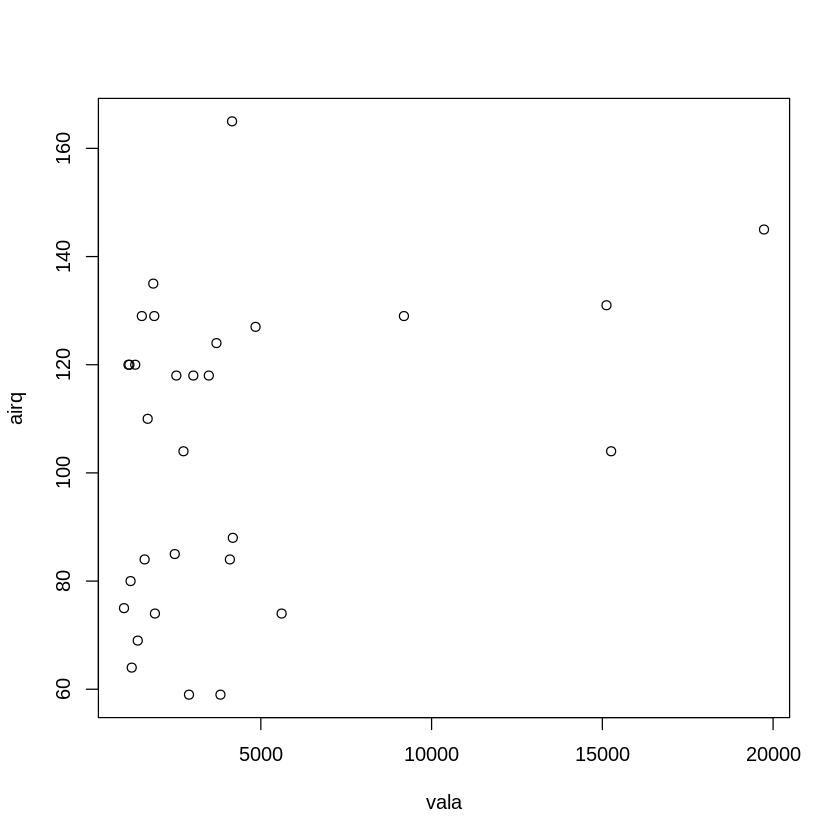

In [7]:
plot(airq~vala, data=Airq)

### Criando um modelo estatístico

y (resposta) ~ x (explicativa)
airq ~ vala + coas + rain

## Montando o modelo

In [8]:
m1<-lm(airq~vala, data=Airq) #lm (modelo linear)

Alguns dados podem não ser lineares

In [9]:
m1


Call:
lm(formula = airq ~ vala, data = Airq)

Coefficients:
(Intercept)         vala  
  96.451419     0.001969  


In [10]:
summary(m1) #Para saber a significância do modelo


Call:
lm(formula = airq ~ vala, data = Airq)

Residuals:
    Min      1Q  Median      3Q     Max 
-44.970 -22.002   7.228  20.774  60.361 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 96.451419   6.691801  14.413 1.76e-14 ***
vala         0.001969   0.001082   1.821   0.0794 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.97 on 28 degrees of freedom
Multiple R-squared:  0.1058,	Adjusted R-squared:  0.07391 
F-statistic: 3.314 on 1 and 28 DF,  p-value: 0.07938


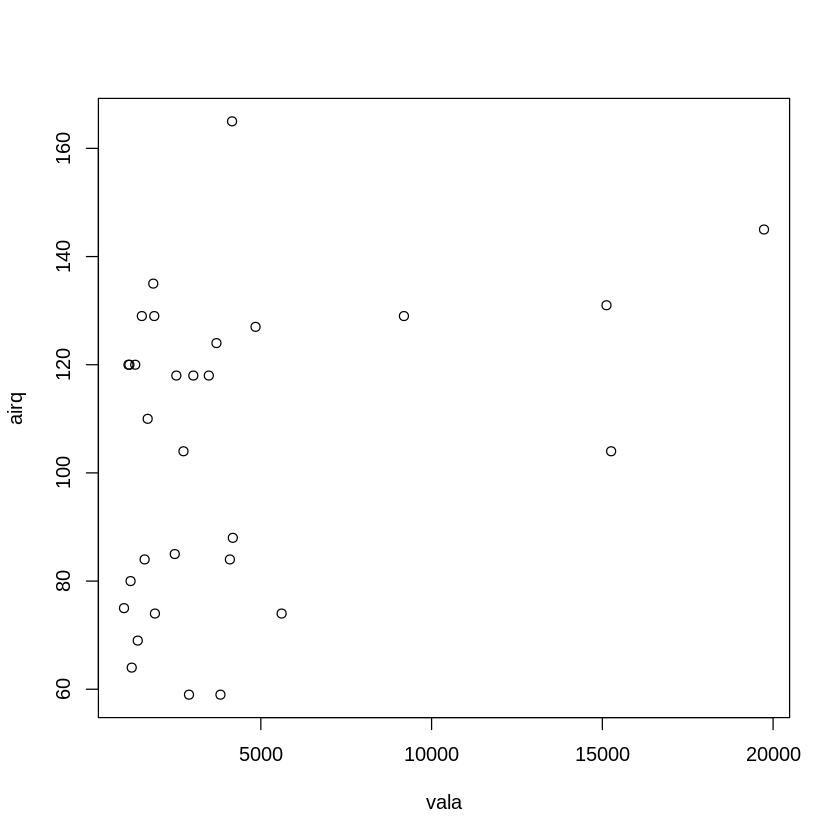

In [11]:
plot(airq~vala, data=Airq)

O p-valor indica a significância do modelo ou da variável.

Se p-valor for menor que (<) 0.05 a variável é significativa.

Se p-valor for maior que 0.05 não existe o efeito esperado.

A variável "vala" não influenciou a qualidade do ar nas cidades ("airq").

#### A variável "coas" afeta a variável "airq"?

In [12]:
m2<-lm(airq~coas, data=Airq)

In [13]:
summary(m2)


Call:
lm(formula = airq ~ coas, data = Airq)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.857 -15.726  -6.333  17.167  69.143 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  125.333      8.288  15.123 5.32e-15 ***
coasyes      -29.476      9.906  -2.976  0.00596 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.86 on 28 degrees of freedom
Multiple R-squared:  0.2403,	Adjusted R-squared:  0.2131 
F-statistic: 8.855 on 1 and 28 DF,  p-value: 0.005965


Sim! A posição costeira da cidade influência a qualidade do ar das cidades

As cidades costeiras apresentam uma melhor qualidade do ar

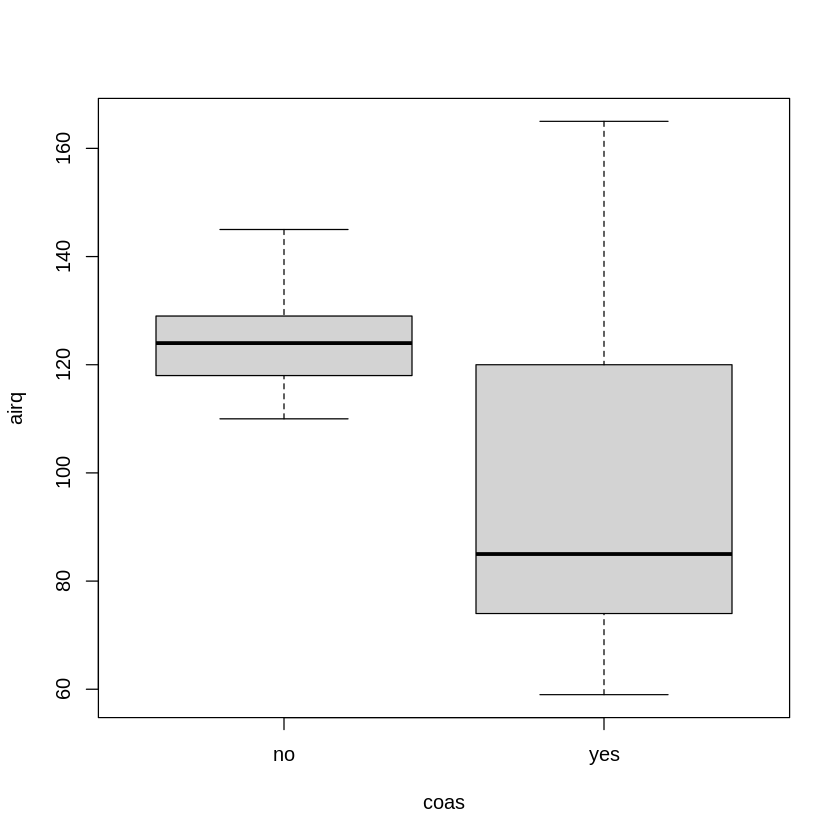

In [14]:
plot(airq~coas, data=Airq)

#### A variável "medi" afeta a qualidade do ar?

In [15]:
m3<-lm(airq~medi, data=Airq)

In [16]:
summary(m3)


Call:
lm(formula = airq ~ medi, data = Airq)

Residuals:
    Min      1Q  Median      3Q     Max 
-49.214 -21.358   5.696  19.247  60.410 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 9.936e+01  6.365e+00  15.609  2.4e-15 ***
medi        5.638e-04  4.102e-04   1.374     0.18    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 27.61 on 28 degrees of freedom
Multiple R-squared:  0.0632,	Adjusted R-squared:  0.02975 
F-statistic: 1.889 on 1 and 28 DF,  p-value: 0.1802


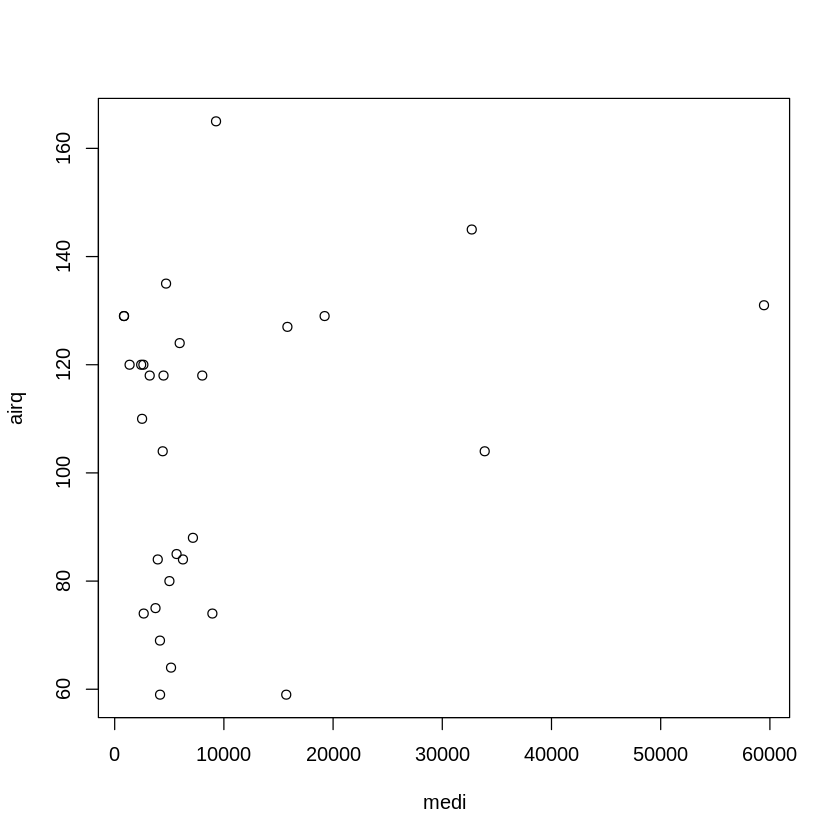

In [17]:
plot(airq~medi, data=Airq)

A variável não afetou a qualidade do ar.

#### A quantidade de chuva influencia na qualidade do ar?

In [18]:
m4<-lm(airq~rain, data=Airq)

In [19]:
summary(m4)


Call:
lm(formula = airq ~ rain, data = Airq)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.648 -24.679   9.367  21.734  60.303 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 106.6662    15.0895   7.069 1.09e-07 ***
rain         -0.0545     0.3926  -0.139    0.891    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 28.51 on 28 degrees of freedom
Multiple R-squared:  0.0006878,	Adjusted R-squared:  -0.035 
F-statistic: 0.01927 on 1 and 28 DF,  p-value: 0.8906


A quantidade chuva não afeta a qualidade do ar.

#### A densidade populacional afeta a qualidade do ar?

In [20]:
m5<-lm(airq~dens, data=Airq)

In [21]:
summary(m5)


Call:
lm(formula = airq ~ dens, data = Airq)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.051 -24.248   8.847  22.365  59.937 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.054e+02  6.128e+00  17.195   <2e-16 ***
dens        -3.857e-04  1.872e-03  -0.206    0.838    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 28.5 on 28 degrees of freedom
Multiple R-squared:  0.001514,	Adjusted R-squared:  -0.03415 
F-statistic: 0.04246 on 1 and 28 DF,  p-value: 0.8382


Não existe um efeito da densidade populacional da qualidade do ar.

A única variável que explica a qualidade do ar nas cidades é a posição costeira.

Termos: anova (variável contínua ~de uma variável categórica);

regressão (variável contínua - variável contínua)

regressão múltipla (variável contínua - variáveis contínuas ou não)

Retas de modelos não significativos são opcionais nos gráficos.


### Retas nos gráficos

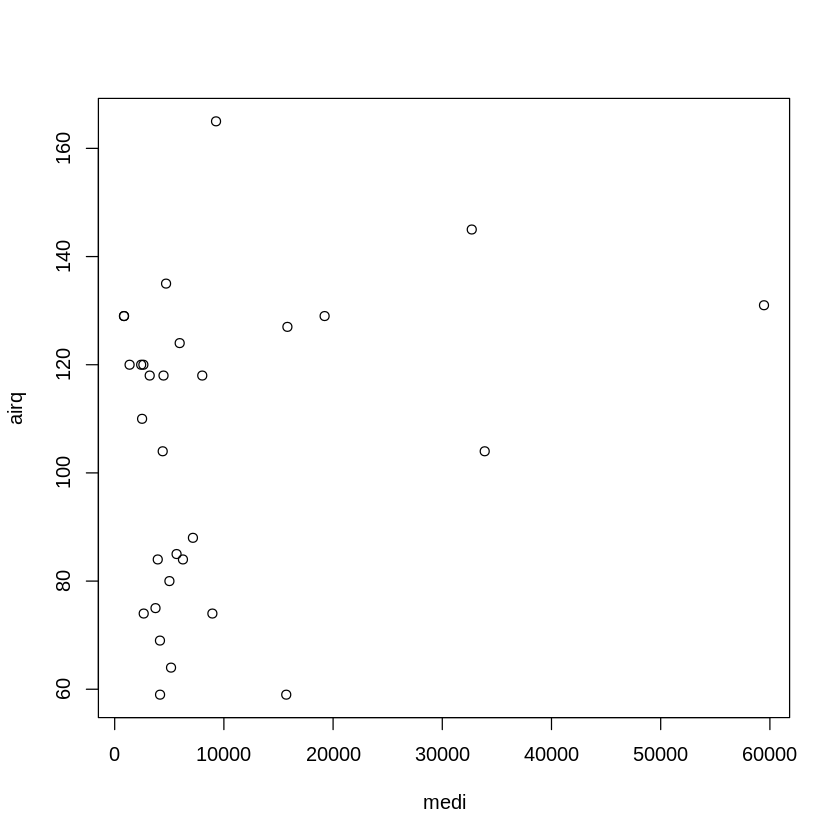

In [22]:
plot(airq~medi, data=Airq)

y=a+b*x

a <- intercepto (onde a reta vai tocar no eixo y)

b <- é a inclinação da reta

In [24]:
summary(m3)


Call:
lm(formula = airq ~ medi, data = Airq)

Residuals:
    Min      1Q  Median      3Q     Max 
-49.214 -21.358   5.696  19.247  60.410 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 9.936e+01  6.365e+00  15.609  2.4e-15 ***
medi        5.638e-04  4.102e-04   1.374     0.18    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 27.61 on 28 degrees of freedom
Multiple R-squared:  0.0632,	Adjusted R-squared:  0.02975 
F-statistic: 1.889 on 1 and 28 DF,  p-value: 0.1802


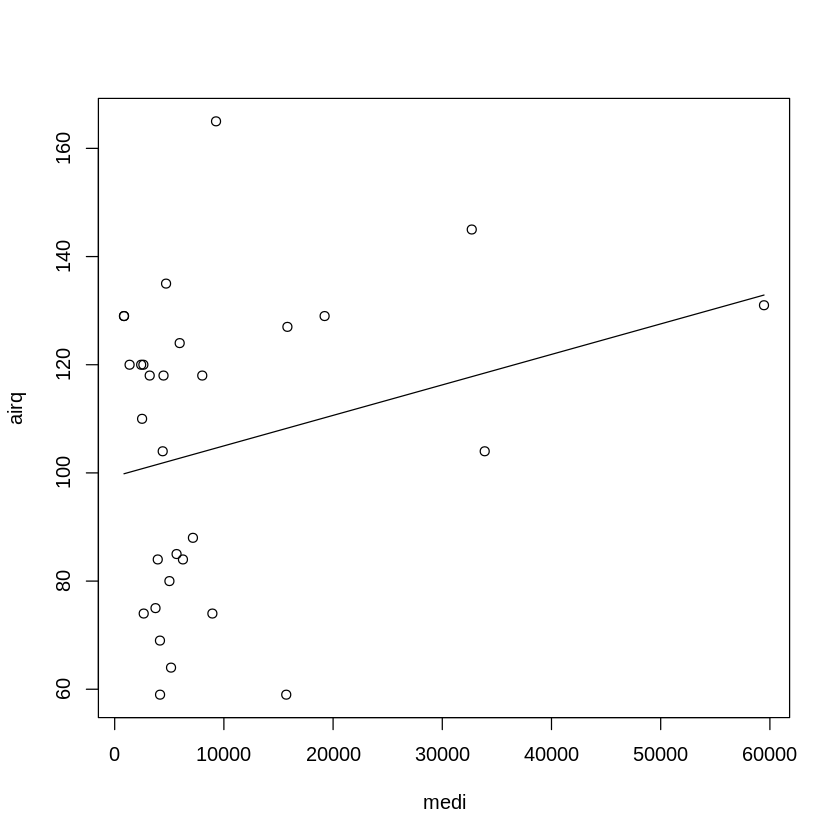

In [28]:
plot(airq~medi, data=Airq)
curve(9.936e+01+5.638e-04*x, add=TRUE)

#### Melhorando o gráfico

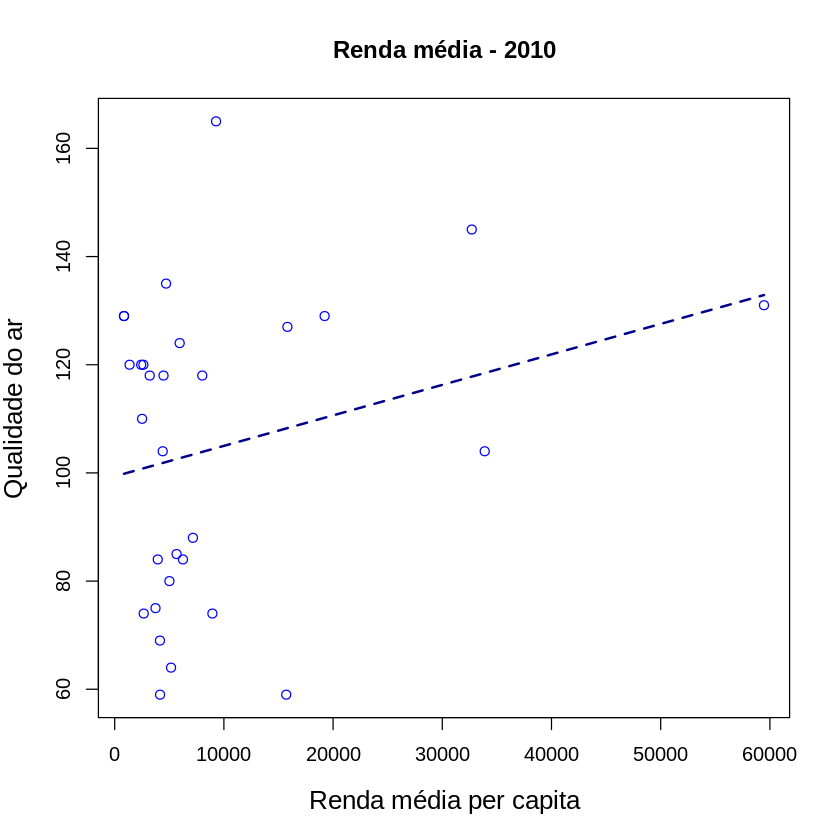

In [34]:
plot(airq~medi, data=Airq, xlab="Renda média per capita", ylab="Qualidade do ar", pch=1, col="blue", cex.lab=1.3, main="Renda média - 2010")
curve(9.936e+01+5.638e-04*x, add=TRUE, col="darkblue", lwd=2, lty=2)

### Melhorando os gráficos

In [35]:
summary(m1)


Call:
lm(formula = airq ~ vala, data = Airq)

Residuals:
    Min      1Q  Median      3Q     Max 
-44.970 -22.002   7.228  20.774  60.361 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 96.451419   6.691801  14.413 1.76e-14 ***
vala         0.001969   0.001082   1.821   0.0794 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.97 on 28 degrees of freedom
Multiple R-squared:  0.1058,	Adjusted R-squared:  0.07391 
F-statistic: 3.314 on 1 and 28 DF,  p-value: 0.07938


y=a+b*x

a <- intercepto

b <- inclinação


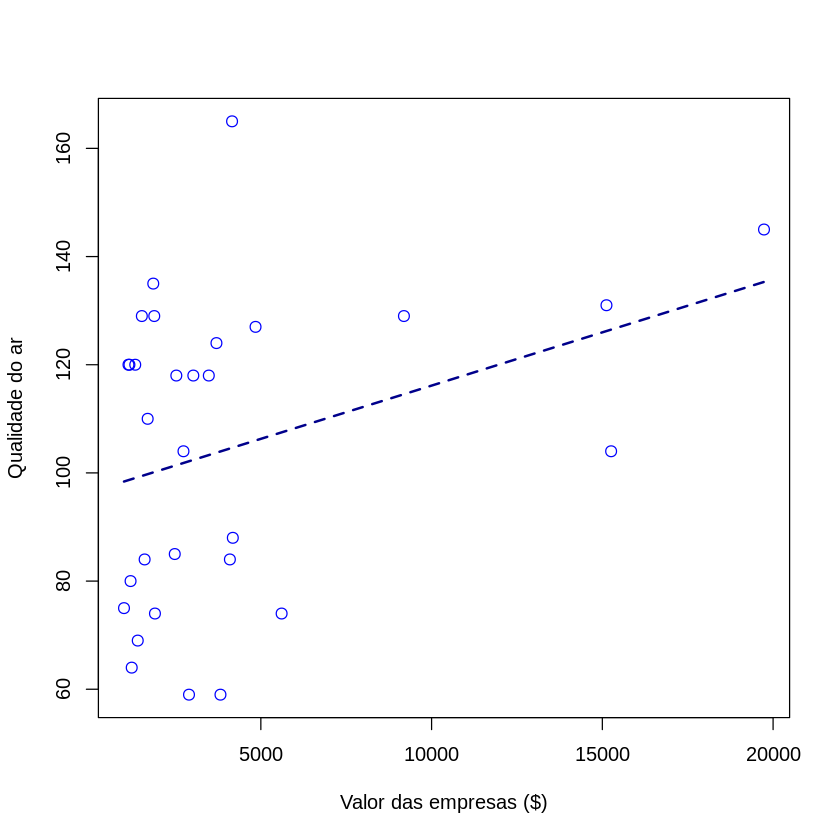

In [41]:
plot(airq~vala, data=Airq, xlab="Valor das empresas ($)", 
    ylab="Qualidade do ar", 
    col="blue",
    pch=1,
    cex=1.2)
    
curve(96.451419+0.001969*x, add=TRUE, col="darkblue", lwd=2, lty=2)

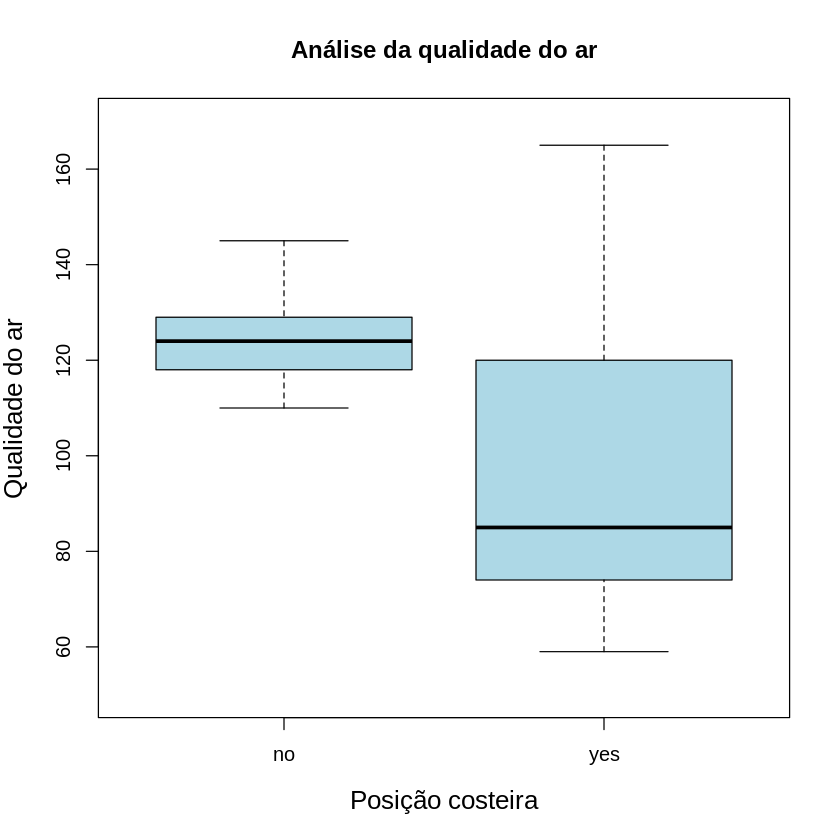

In [45]:
plot(airq~coas, data=Airq, xlab="Posição costeira", ylab="Qualidade do ar", 
    col="lightblue", ylim=c(50, 170), cex.lab=1.3, main="Análise da qualidade do ar")

### Exercícios

In [47]:
m5<-lm(airq~dens, data=Airq)
summary(m5)


Call:
lm(formula = airq ~ dens, data = Airq)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.051 -24.248   8.847  22.365  59.937 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.054e+02  6.128e+00  17.195   <2e-16 ***
dens        -3.857e-04  1.872e-03  -0.206    0.838    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 28.5 on 28 degrees of freedom
Multiple R-squared:  0.001514,	Adjusted R-squared:  -0.03415 
F-statistic: 0.04246 on 1 and 28 DF,  p-value: 0.8382


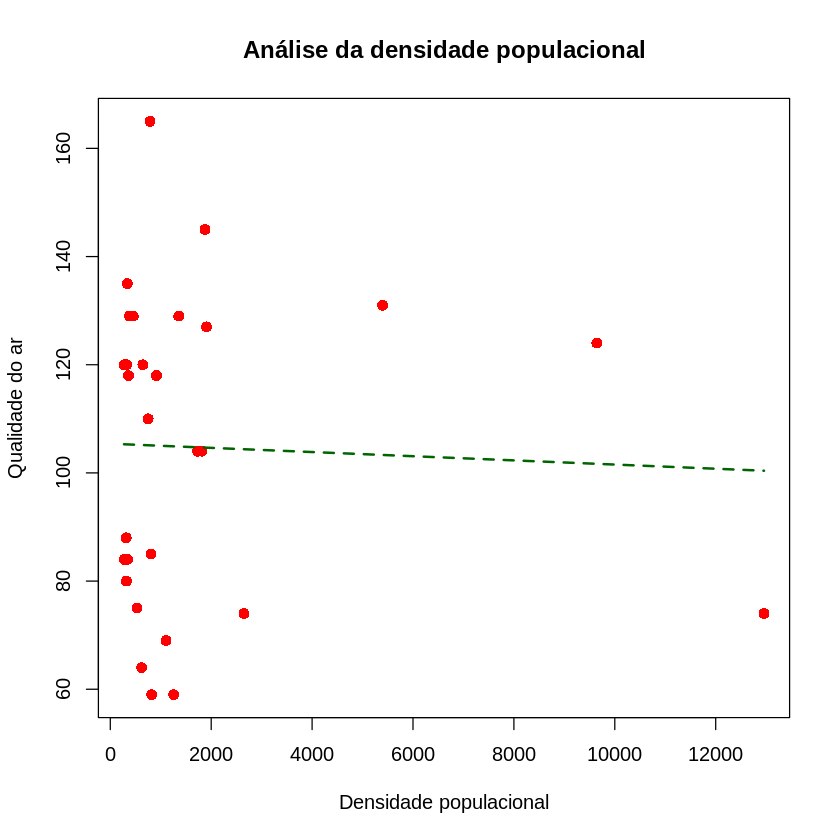

In [51]:
plot(airq~dens, data = Airq, main="Análise da densidade populacional", ylab="Qualidade do ar", xlab="Densidade populacional",
    col="red",
    pch=16,
    cex=1.2)
curve(1.054e+02+-3.857e-04*x, add= TRUE, col="darkgreen", lwd=2, lty=2)

## Regressão múltipla

In [53]:
mRM1<-lm(airq~vala+coas, data=Airq)
summary(mRM1)


Call:
lm(formula = airq ~ vala + coas, data = Airq)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.056 -13.349  -5.879  12.785  69.265 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.171e+02  8.717e+00  13.434  1.8e-13 ***
vala         1.999e-03  9.397e-04   2.128  0.04264 *  
coasyes     -2.968e+01  9.336e+00  -3.179  0.00369 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.43 on 27 degrees of freedom
Multiple R-squared:  0.3494,	Adjusted R-squared:  0.3012 
F-statistic: 7.249 on 2 and 27 DF,  p-value: 0.003021


Então existe um efeito da posição costeira e do valor das empresas na qualidade do ar.

### Gráfico regressão múltipla

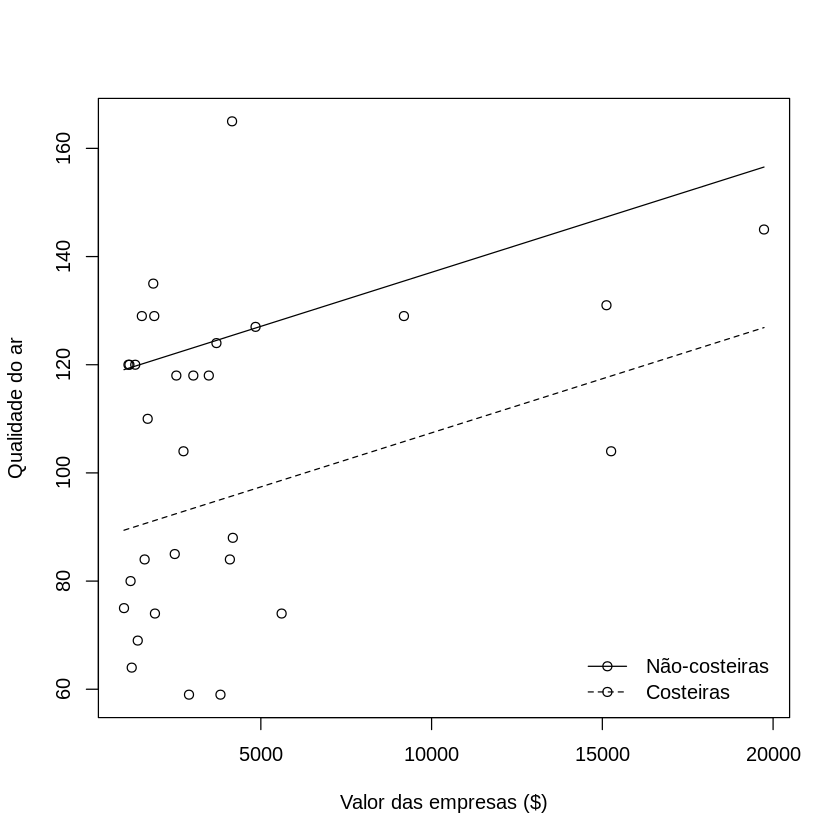

In [57]:
plot(airq~vala, data=Airq, xlab="Valor das empresas ($)", ylab="Qualidade do ar")
curve(1.171e+02+1.999e-03*x, add=TRUE) #cidade não costeira
curve(1.171e+02+1.999e-03*x+-2.968e+01, lty=2, add=TRUE) #cidade costeira
legend("bottomright", c("Não-costeiras", "Costeiras"), pch=1, lty=c(1,2), bty="n")

A qualidade do ar das cidades é afetada tanto pelo valor das empresas quanto pela posição costeira das cidades. Quanto maior o valor das empresas, pior o qualidade do ar das cidades. Além disso, as cidades não-costeiras apresentam qualidade do ar pior do que as cidades costeiras.

In [58]:
mRM2<-lm(airq~vala+coas+dens, data=Airq)
summary(mRM2)


Call:
lm(formula = airq ~ vala + coas + dens, data = Airq)

Residuals:
   Min     1Q Median     3Q    Max 
-36.46 -12.83  -6.34  12.70  68.42 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.183e+02  9.066e+00  13.046 6.43e-13 ***
vala         2.086e-03  9.638e-04   2.165  0.03977 *  
coasyes     -2.966e+01  9.454e+00  -3.137  0.00421 ** 
dens        -9.005e-04  1.578e-03  -0.571  0.57317    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.73 on 26 degrees of freedom
Multiple R-squared:  0.3574,	Adjusted R-squared:  0.2833 
F-statistic:  4.82 on 3 and 26 DF,  p-value: 0.008454


Parece que a densidade, ela não exerce um efeito sobre a qualidade do ar, mas observe que, apesar de não existir um efeito, os valores modificaram, tanto valor de estimate, valor de P, se nós comparamos aqui em cima 0.3977 para Vala e no modelo anterior, como foi? 0.4264 e isso é extremamente interessante.

Porque, apesar da variável densidade não ter sido significativa, ela exerce um efeito nas demais variáveis, tanto que o nosso valor de P modificou. E isso não quer dizer que necessariamente nós podemos tirar a densidade do nosso modelo.

Porque bem ou mal, ela tá fazendo efeito ali, em algumas situações essa diferença pode ser mínima, mas o suficiente para mudar significância de alguma outra variável.

 Então, você não deve retirar as variáveis de qualquer jeito do seu modelo, existem métodos de fazer isso. Porque, apesar de ela não ser significativa, ela pode influenciar nas outras variáveis, ao ponto das demais deixarem de ser significativas, e é isso que nós vamos ver agora métodos recomendados para se tirar variáveis de modelos completos que não forem significativos.

#### Contraste de modelos

Comparar um modelo completo com um modelo sem a variável em questão.

In [59]:
modelocompleto<-lm(airq~vala+coas+dens, data=Airq)
modeloincompleto<-lm(airq~vala+coas, data=Airq)

Os modelos são iguais?

Se p>0.05 não existe diferença entre os modelos, então eu continuo com o modelo mais simples; se p<0.05 os modelos são diferentes e a variável não deve ser retirada do modelo.

In [60]:
anova(modelocompleto, modeloincompleto)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,26,14639.75,NA,NA,NA,NA
2,27,14823.07,-1,-183.3266,0.3255856,0.573169


Podemos ficar com o modelo mais simples (sem a variável dens), pois o p é maior que 0.05.